In [20]:
# Fashion MNIST dataset으로 CNN 처리
# 실습 1 : Conv + Dense

import tensorflow as tf
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(60000, 28, 28, 1) (10000, 28, 28, 1)


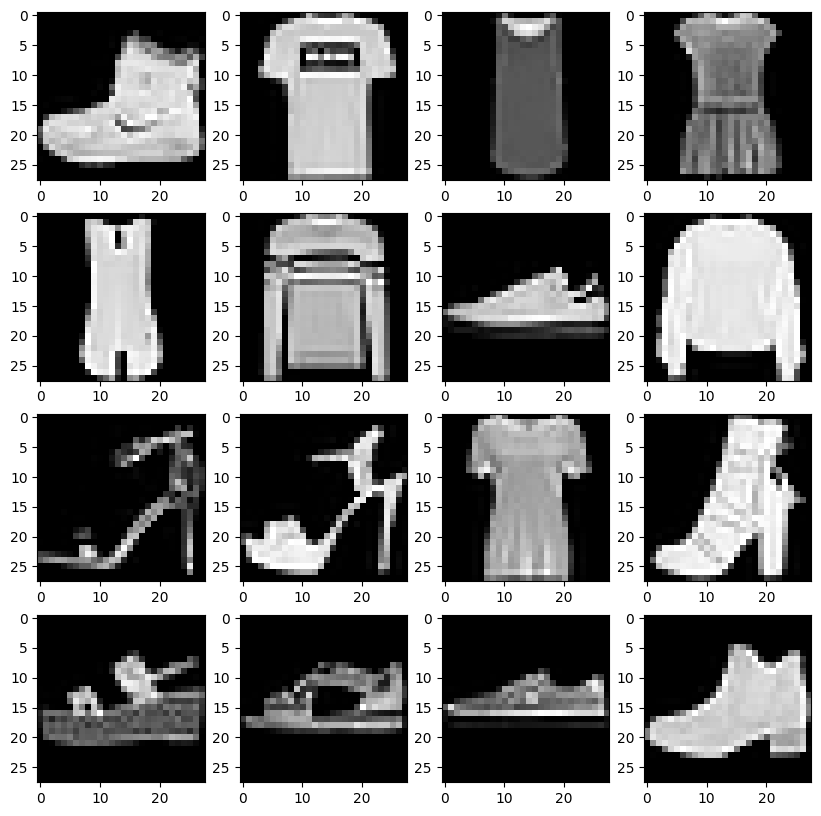

In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0
# print(x_train[0])

# 4차원
x_train = x_train.reshape(-1, 28, 28, 1)
x_test= x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, x_test.shape)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(x_train[c].reshape(28, 28), cmap='gray')

plt.show()  

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │     1,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,006,474 (7.65 MB)

 Trainable params: 2,006,474 (7.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1407/1407 - 25s - 17ms/step - accuracy: 0.6954 - loss: 55.7682 - val_accuracy: 0.7753 - val_loss: 224.3382
Epoch 2/15
1407/1407 - 23s - 16ms/step - accuracy: 0.7043 - loss: 3051.8247 - val_accuracy: 0.7528 - val_loss: 7141.8677
Epoch 3/15
1407/1407 - 23s - 16ms/step - accuracy: 0.7084 - loss: 43216.3516 - val_accuracy: 0.7275 - val_loss: 88647.1406
Epoch 4/15
1407/1407 - 23s - 17ms/step - accuracy: 0.7089 - loss: 210052.2812 - val_accuracy: 0.7511 - val_loss: 231485.3281
Epoch 5/15
1407/1407 - 23s - 16ms/step - accuracy: 0.7076 - loss: 571500.4375 - val_accuracy: 0.7268 - val_loss: 832335.2500
Epoch 6/15
1407/1407 - 23s - 16ms/step - accuracy: 0.7135 - loss: 1307718.7500 - val_accuracy: 0.7168 - val_loss: 1193869.2500
Epoch 7/15
1407/1407 - 22s - 16ms/step - accuracy: 0.7134 - loss: 2422974.5000 - val_accuracy: 0.7608 - val_loss: 2290284.7500
Epoch 8/15
1407/1407 - 23s - 16ms/step - accuracy: 0.7148 - loss: 3809360.0000 - val_accuracy: 0.7294 - val_loss: 3354642.0000
Epoch 9

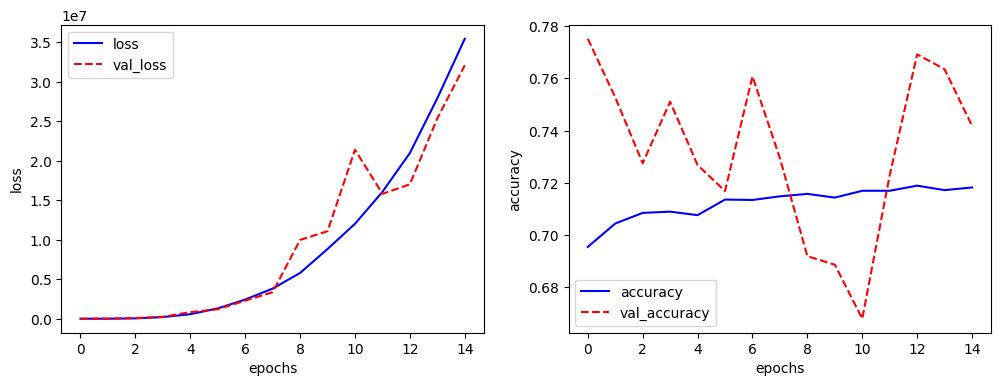

In [16]:
# 실습 1 : Conv + Dense
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 15
# 학습
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.25, verbose=2)

# 평가
print(model.evaluate(x_test, y_test, verbose=0))

# 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.close()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,106 (109.79 KB)

 Trainable params: 28,106 (109.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1407/1407 - 21s - 15ms/step - accuracy: 0.7268 - loss: 0.7762 - val_accuracy: 0.8087 - val_loss: 0.5721
Epoch 2/6
1407/1407 - 19s - 13ms/step - accuracy: 0.7926 - loss: 0.6272 - val_accuracy: 0.8157 - val_loss: 0.5358
Epoch 3/6
1407/1407 - 19s - 13ms/step - accuracy: 0.8059 - loss: 0.5913 - val_accuracy: 0.8323 - val_loss: 0.4932
Epoch 4/6
1407/1407 - 16s - 12ms/step - accuracy: 0.8067 - loss: 0.6138 - val_accuracy: 0.7945 - val_loss: 0.6975
Epoch 5/6
1407/1407 - 17s - 12ms/step - accuracy: 0.8039 - loss: 0.6609 - val_accuracy: 0.8190 - val_loss: 0.5892
Epoch 6/6
1407/1407 - 18s - 13ms/step - accuracy: 0.8042 - loss: 0.7029 - val_accuracy: 0.8105 - val_loss: 0.6582
[0.6797448992729187, 0.8047999739646912]


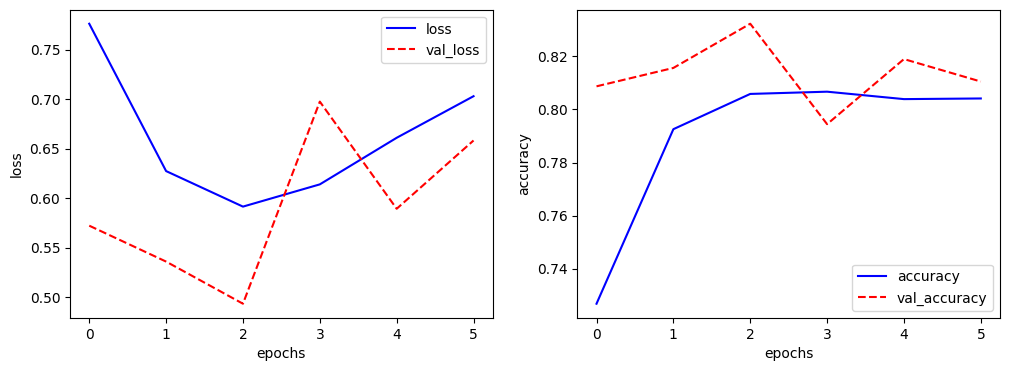

In [ ]:
# 실습 2 : (Conv + Pooling) + Dense
# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 6
# 학습
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.25, verbose=2)

# 평가
print(model.evaluate(x_test, y_test, verbose=0))

# 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.close()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,240,842 (19.99 MB)

 Trainable params: 5,240,842 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1407/1407 - 46s - 33ms/step - accuracy: 0.6546 - loss: 21.8215 - val_accuracy: 0.8101 - val_loss: 14.3574
Epoch 2/6
1407/1407 - 43s - 31ms/step - accuracy: 0.7336 - loss: 703.5540 - val_accuracy: 0.7932 - val_loss: 1858.2642
Epoch 3/6
1407/1407 - 43s - 31ms/step - accuracy: 0.7528 - loss: 13085.0771 - val_accuracy: 0.8207 - val_loss: 24781.3516
Epoch 4/6
1407/1407 - 44s - 31ms/step - accuracy: 0.7638 - loss: 68144.1328 - val_accuracy: 0.8048 - val_loss: 100578.9688
Epoch 5/6
1407/1407 - 44s - 31ms/step - accuracy: 0.7727 - loss: 218120.7812 - val_accuracy: 0.8317 - val_loss: 167259.0625
Epoch 6/6
1407/1407 - 46s - 32ms/step - accuracy: 0.7709 - loss: 855627.6250 - val_accuracy: 0.8391 - val_loss: 662983.1875
[694845.875, 0.8342999815940857]


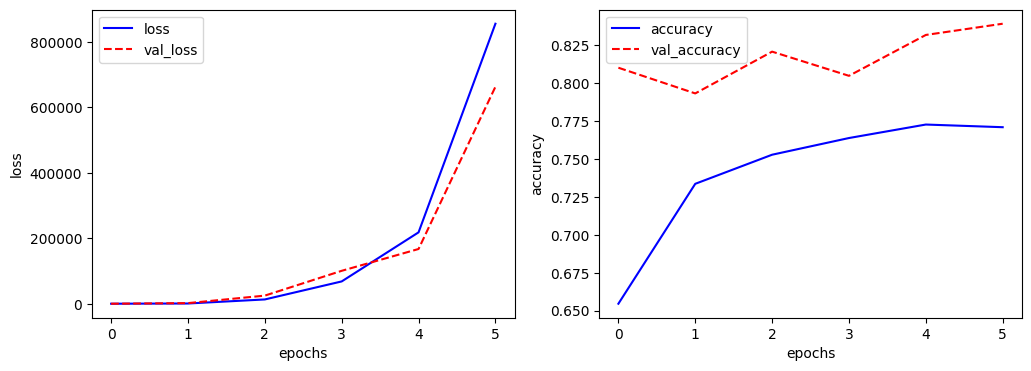

In [29]:
# 실습 3 : 효율 향상을 위해 성능 좋은 기본 네트워크 일부 도용
# VGGNet style 네트워크
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 6
# 학습
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.25, verbose=2)

# 평가
print(model.evaluate(x_test, y_test, verbose=0))

# 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.close()

(80000, 28, 28, 1)
(80000,)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,240,842 (19.99 MB)

 Trainable params: 5,240,842 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
1875/1875 - 56s - 30ms/step - accuracy: 0.6790 - loss: 5.1482 - val_accuracy: 0.3345 - val_loss: 76.5197
Epoch 2/6
1875/1875 - 52s - 28ms/step - accuracy: 0.7437 - loss: 323.3436 - val_accuracy: 0.3201 - val_loss: 4796.5254
Epoch 3/6
1875/1875 - 52s - 28ms/step - accuracy: 0.7677 - loss: 3351.7864 - val_accuracy: 0.3378 - val_loss: 96039.8750
Epoch 4/6
1875/1875 - 53s - 28ms/step - accuracy: 0.7844 - loss: 20812.9336 - val_accuracy: 0.3159 - val_loss: 424323.3125
Epoch 5/6
1875/1875 - 52s - 28ms/step - accuracy: 0.7886 - loss: 116918.4766 - val_accuracy: 0.3396 - val_loss: 2207197.7500
Epoch 6/6
1875/1875 - 52s - 28ms/step - accuracy: 0.7950 - loss: 337430.7188 - val_accuracy: 0.3252 - val_loss: 5809573.5000
[418705.09375, 0.8226000070571899]


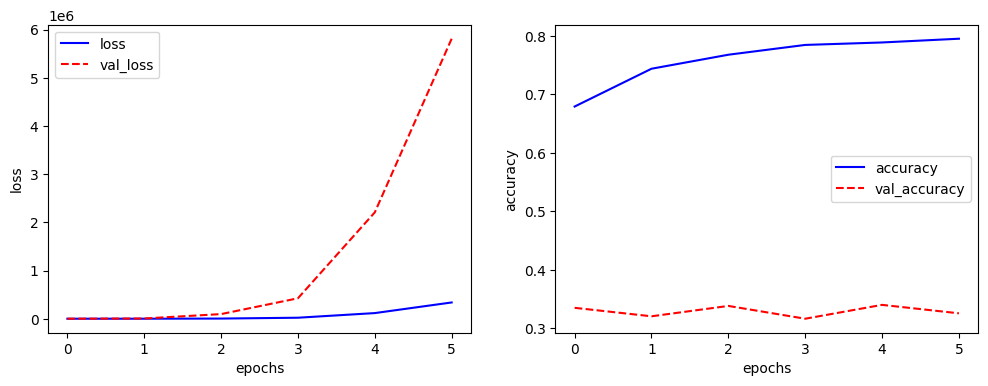

In [28]:
# 이미지 증강(+20000) 후 모델 생성
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gener = ImageDataGenerator(
    rotation_range=15,
    zoom_range = 0.15,
    shear_range=0.5,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
)

augment_size=20000
randidx = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()
gen = img_gener.flow(x_augmented, np.zeros(augment_size), 
                     batch_size=augment_size, shuffle=False)

x_augmented = next(gen)[0]

train_x = np.concatenate((x_train, x_augmented))
train_y = np.concatenate((y_train, y_augmented))

print(train_x.shape)
print(train_y.shape)

# 실습 4

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 6
# 학습
history = model.fit(train_x, train_y, epochs=epochs, validation_split=0.25, verbose=2)

# 평가
print(model.evaluate(x_test, y_test, verbose=0))

# 시각화
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()
plt.close()